In [4]:
print("Hello World")

Hello World


In [5]:
import pandas as pd
df = pd.read_csv('insurance.csv')
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
print(df.isnull().sum())



age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [8]:
categorical_columns = ['sex', 'smoker', 'region']
for column in categorical_columns:
    print(f"Unique values in {column}: {df[column].unique()}")


Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


In [9]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [10]:
df = pd.get_dummies(df, columns=['region'])
df.head()



,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,False,True
1,18,1,33.770,1,0,1725.55230,False,False,True,False
2,28,1,33.000,3,0,4449.46200,False,False,True,False
3,33,1,22.705,0,0,21984.47061,False,True,False,False
4,32,1,28.880,0,0,3866.85520,False,True,False,False


In [11]:
df['region_northeast'] = df['region_northeast'].astype(int)
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

df


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   int64  
 1   sex               1338 non-null   int64  
 2   bmi               1338 non-null   float64
 3   children          1338 non-null   int64  
 4   smoker            1338 non-null   int64  
 5   charges           1338 non-null   float64
 6   region_northeast  1338 non-null   int64  
 7   region_northwest  1338 non-null   int64  
 8   region_southeast  1338 non-null   int64  
 9   region_southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


In [13]:
df.corr()['charges'].sort_values(ascending=False)

charges             1.000000
smoker              0.787251
age                 0.299008
bmi                 0.198341
region_southeast    0.073982
children            0.067998
sex                 0.057292
region_northeast    0.006349
region_northwest   -0.039905
region_southwest   -0.043210
Name: charges, dtype: float64

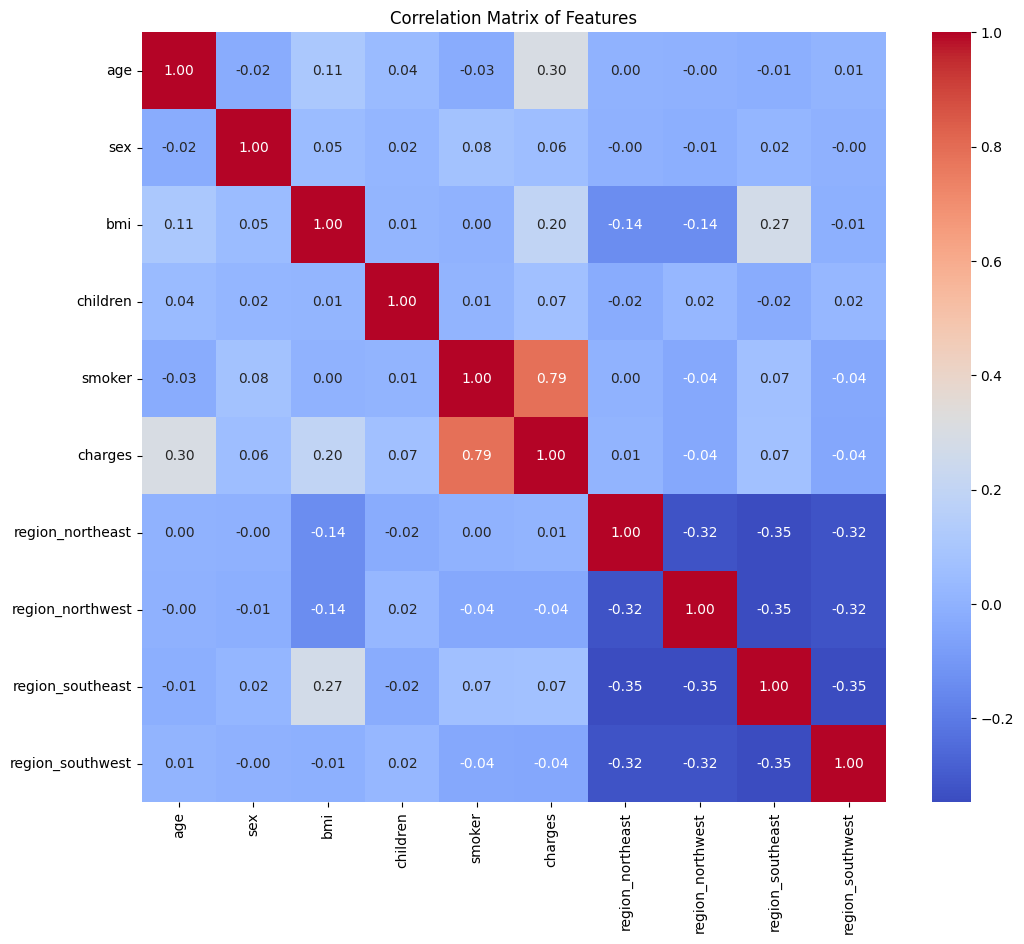

In [14]:
# Correct the import statement for matplotlib
import matplotlib.pyplot as plt  # Change this line
import seaborn as sns  # Ensure seaborn is imported

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

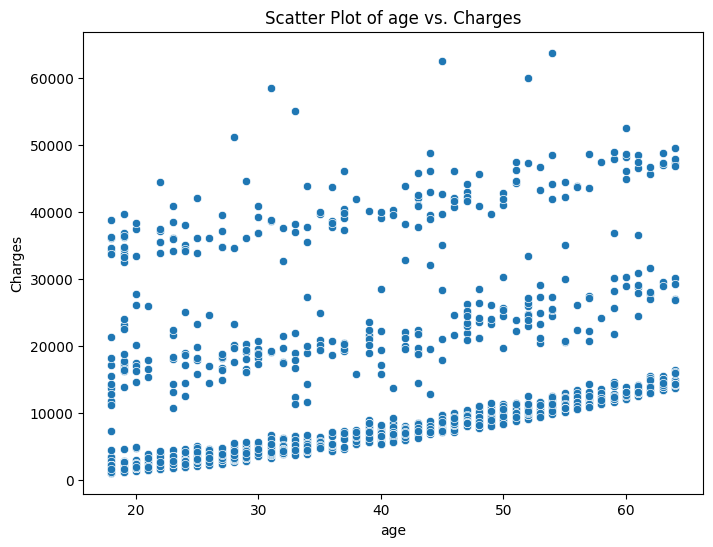

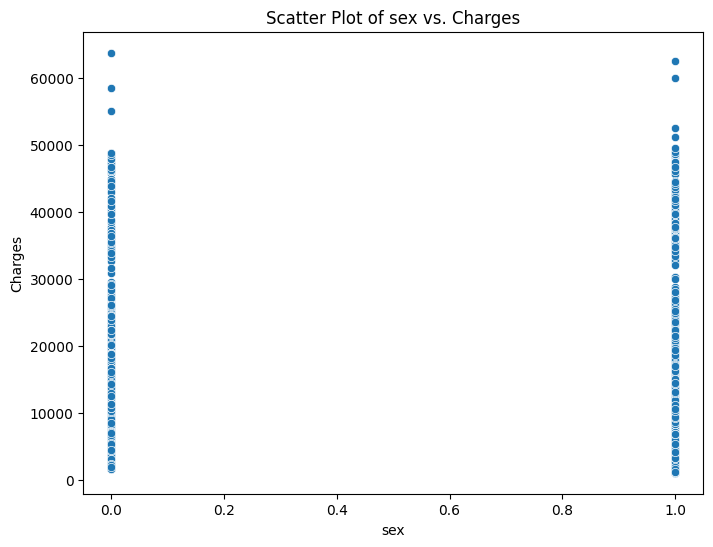

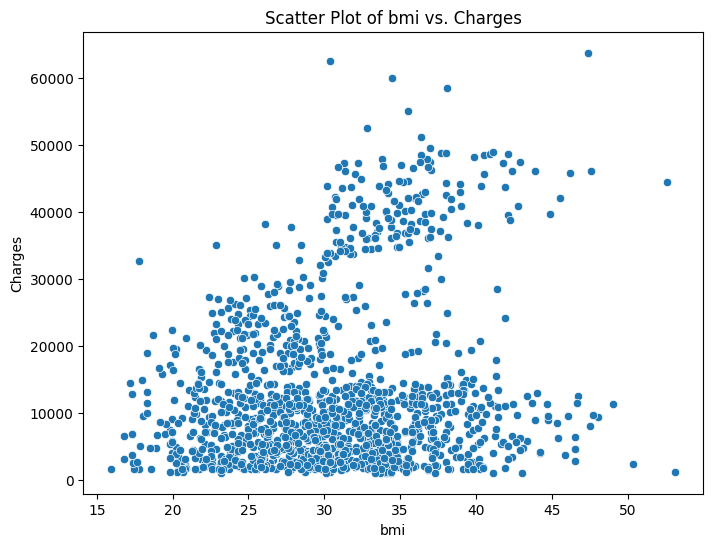

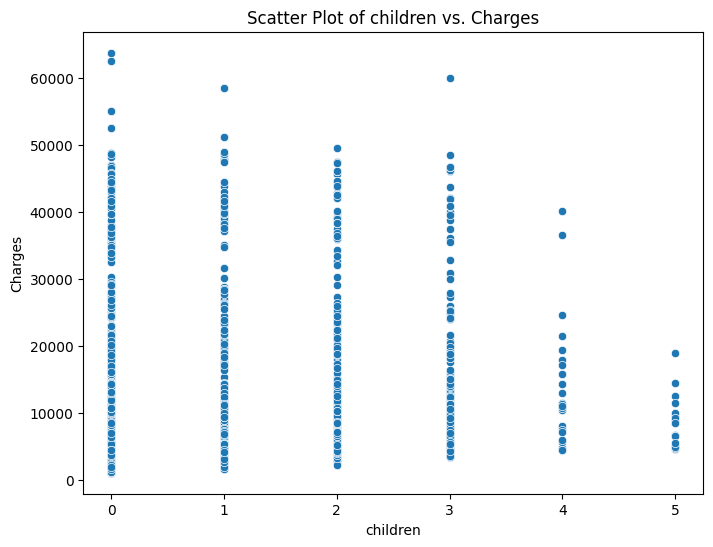

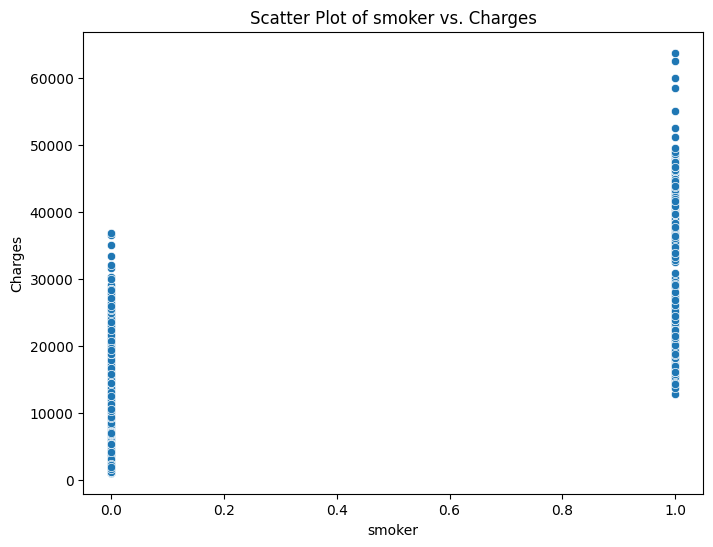

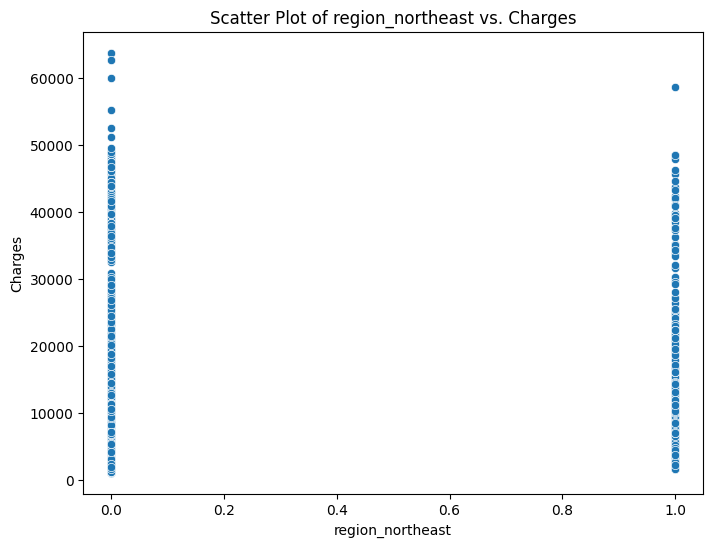

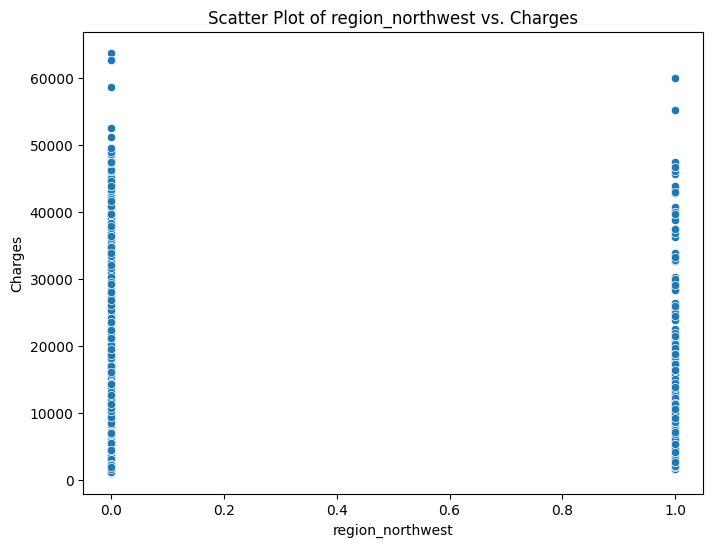

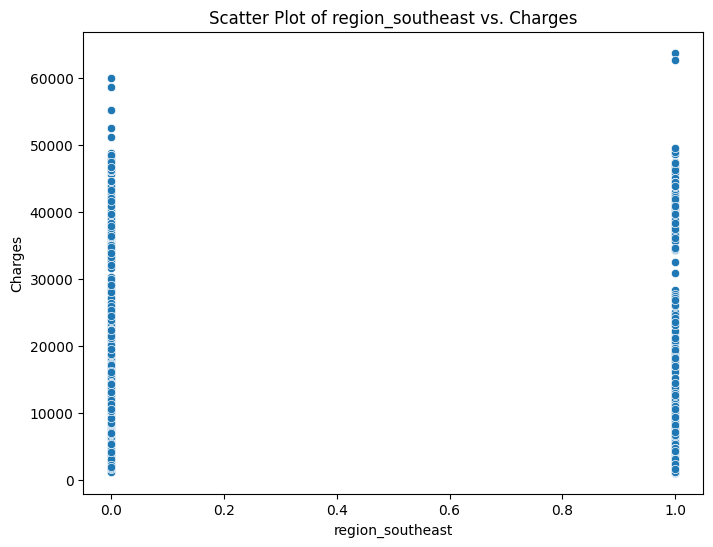

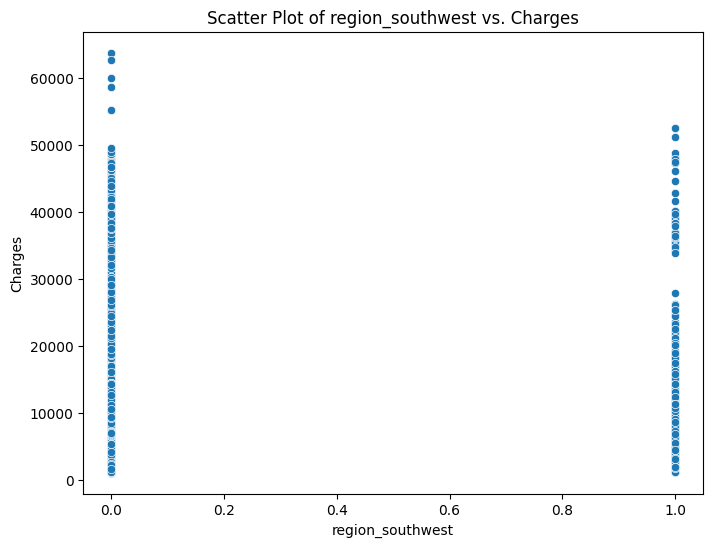

In [15]:
for col in df.columns:
  if col != 'charges':
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='charges', data=df)
    plt.title(f'Scatter Plot of {col} vs. Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

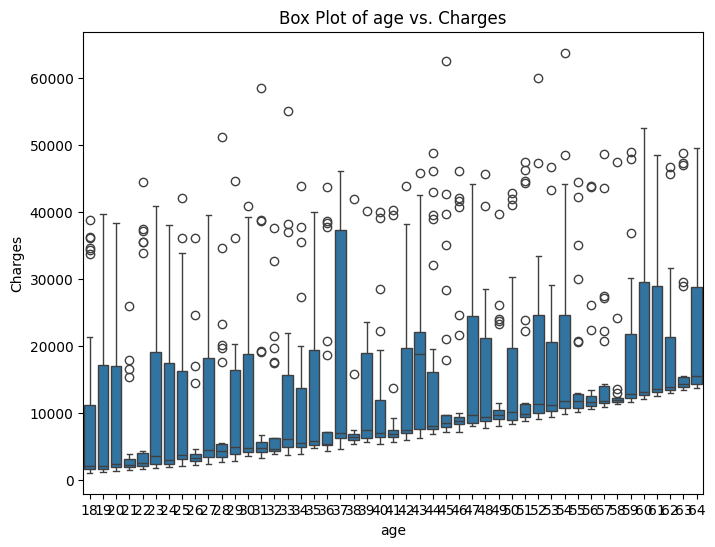

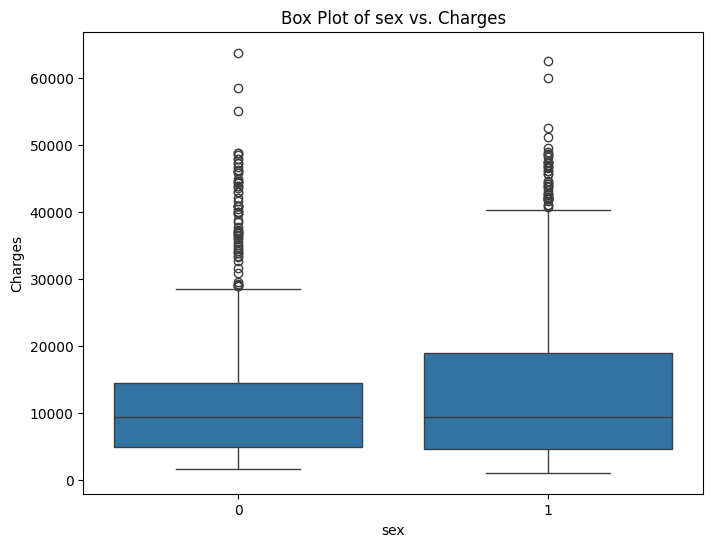

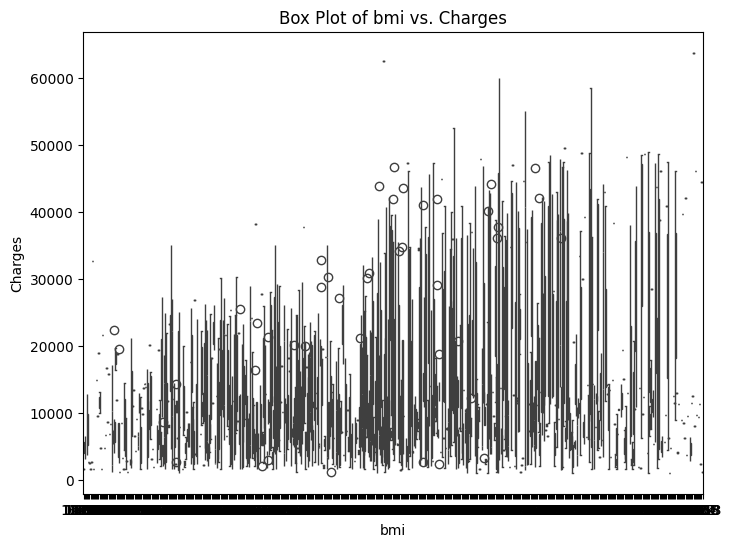

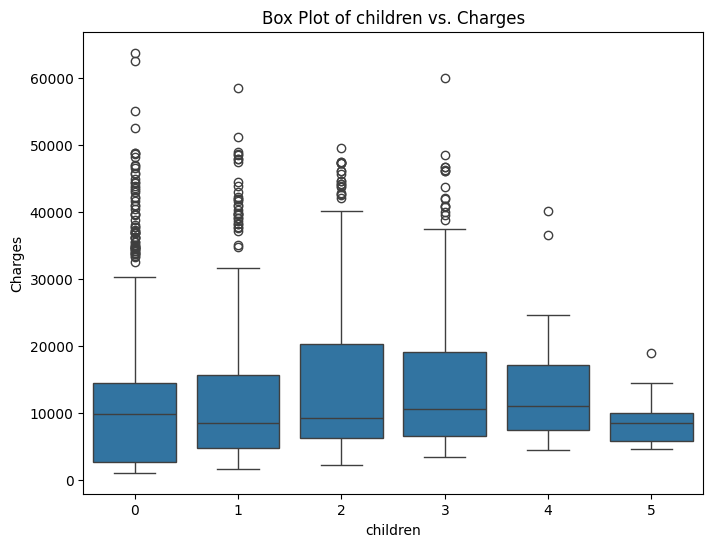

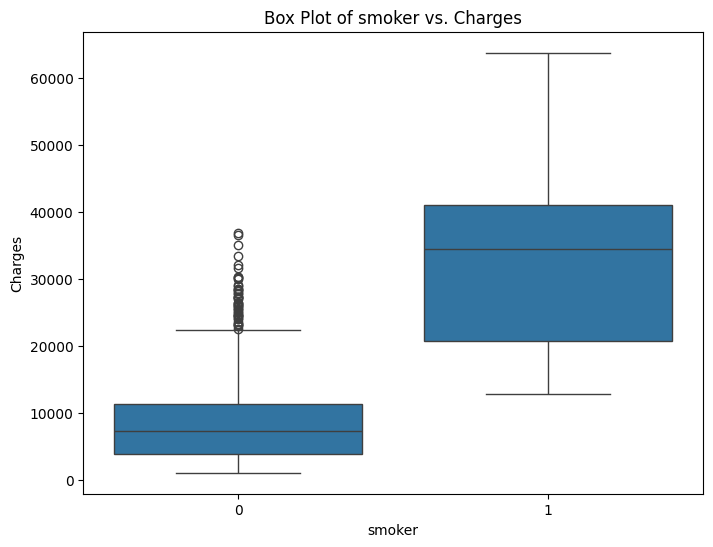

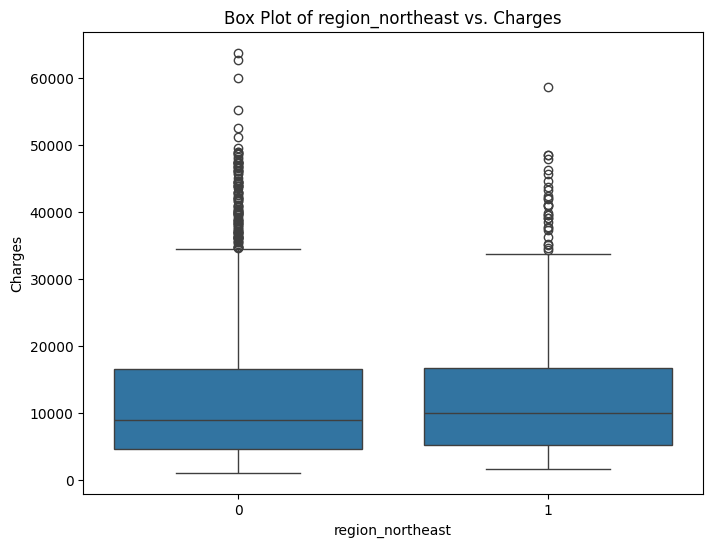

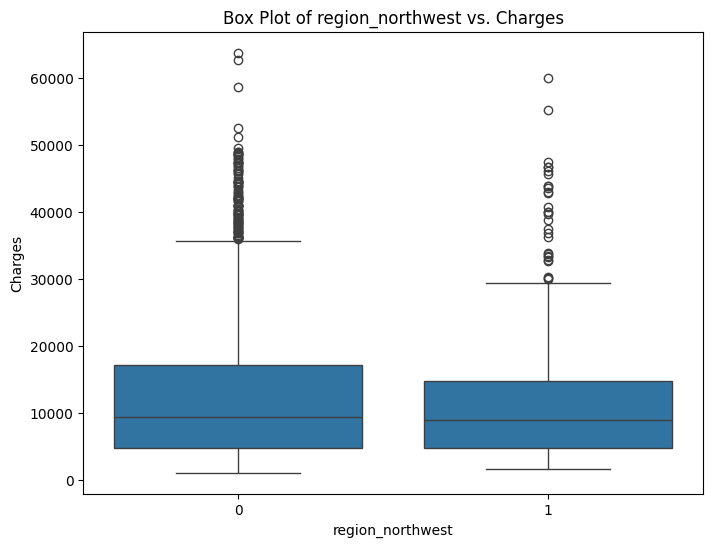

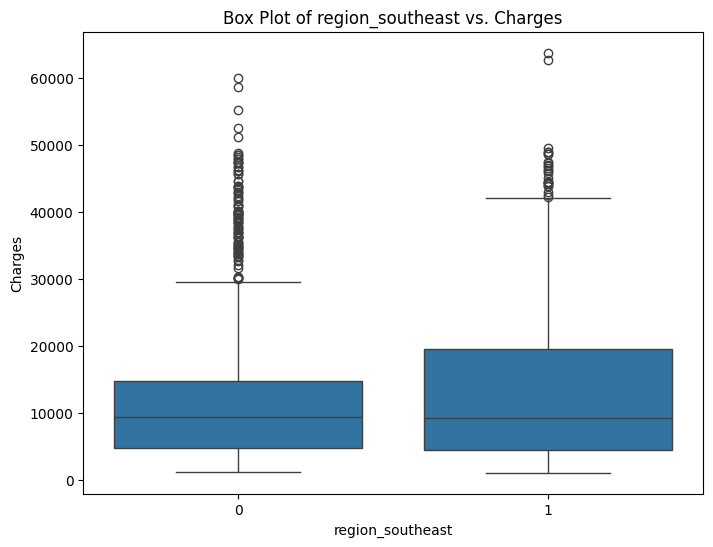

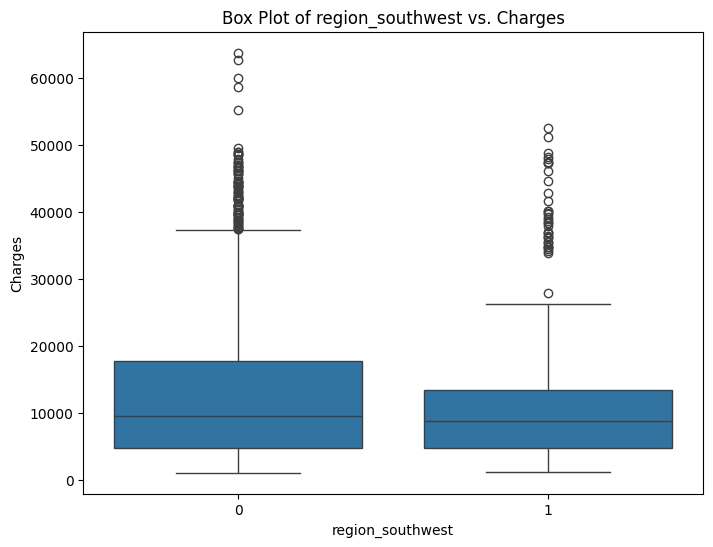

In [16]:
for col in df.columns:
  if col != 'charges':
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, y='charges', data=df)
    plt.title(f'Box Plot of {col} vs. Charges')
    plt.xlabel(col)
    plt.ylabel('Charges')
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target (y)
X = df[['smoker', 'age', 'bmi', 'children']]
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 33981653.95019775
R-squared: 0.7811147722517887


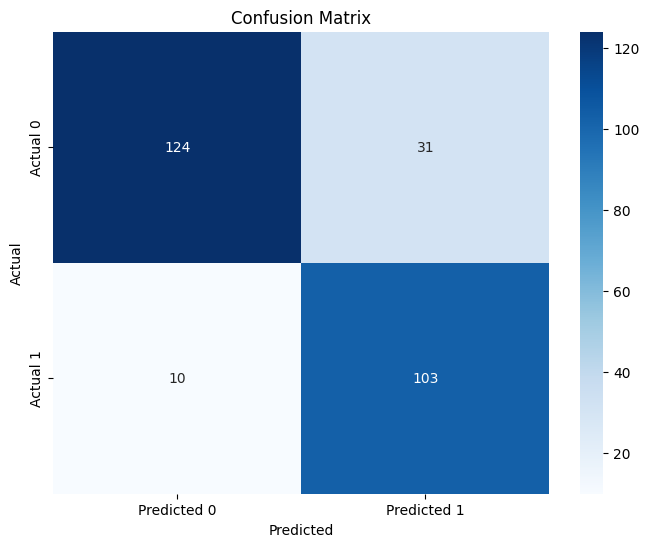

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred' are already defined from your previous code
# For a regression problem, a confusion matrix isn't directly applicable.
# You might want to consider discretizing the predictions or using another metric.

# Example of discretizing the predictions (using a threshold)
threshold = np.median(y_pred) # you may need to adjust this threshold.
y_pred_class = np.where(y_pred > threshold, 1, 0) # 1 if above threshold, 0 otherwise
y_test_class = np.where(y_test > threshold, 1, 0)

cm = confusion_matrix(y_test_class, y_pred_class)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound),
                         df[column].median(), df[column])
    return df

# Handle outliers for 'age', 'bmi', and 'charges'
df = handle_outliers(df, 'age')
df = handle_outliers(df, 'bmi')
df = handle_outliers(df, 'charges')

In [21]:
X = df[['smoker', 'age', 'bmi', 'children']]
y = df['charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 28442400.21714111
R-squared: 0.4337806965895966


In [22]:
import pickle

# Save the trained model to a file
filename = 'final_model.pkl'
pickle.dump(model, open(filename, 'wb'))